In [1]:
#Created by Robert Neagu. Code is not finalized.
#Please note that this code should only be used for educational purposes.
#Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import *

In [2]:
#Set url to search for Nvidia RTX 4090
page = 1
url = f'https://www.ebay.com/sch/i.html?_nkw=nvidia+rtx+4090&_sacat=0&LH_Complete=1&LH_Sold={page}'

In [3]:
#Check for successful connection of 200
page = requests.get(url)
page

<Response [200]>

In [4]:
#If successful connection, store html content in variable soup
if page.status_code == 200:
    soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
#Create lists for scraped data to be inserted into
titles = []
prices = []
shipping = []
condition = []
date_sold = []

#Create main variable that has the div class outside all elements below


for page in range(1, 12):
    url = f'https://www.ebay.com/sch/i.html?_nkw=nvidia+rtx+4090&_sacat=0&LH_Complete=1&LH_Sold={page}'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
    div_tags = soup.find_all('div', class_ = 's-item__info clearfix')
    #For loop to look through various elements inside div_tags. Cycles for every product in the webpage.
    for tag in div_tags:
        #Find product name (and model) and get its text. Name was inside a div element with specific class.
        tag_title = tag.find('div', class_ = 's-item__title').get_text().strip()
        #Remove New Listing, then store name inside the titles list
        tag_title = tag_title.replace('New Listing', '')
        titles.append(tag_title)
        #Find price of product and get its cost. Then store in prices list.
        tag_price = tag.find('div', class_ = 's-item__detail s-item__detail--primary').get_text().strip()
        prices.append(tag_price)
        #Find date the product was sold. Date was stored inside a span element.
        tag_date = tag.find('span', class_ = 'POSITIVE') #Get text later to avoid None tag
        #Obtain text of date now to avoid errors. Also remove Sold text.
        if tag_date:
            tag_date = tag_date.get_text()
            tag_date = tag_date.replace('Sold  ', '')
            #Store refined date in date_sold list
            date_sold.append(tag_date)
        #Disregard if current variable is not tag_date
        else:
            continue
        #Find condition of product and get its text. Then store in condition list.
        tag_condition = tag.find('span', class_ = 'SECONDARY_INFO')
        condition.append(tag_condition.get_text())
        #Find shipping cost of product and get its text.
        tag_ship = tag.find('span', class_ = 's-item__shipping s-item__logisticsCost')
        tag_ship = tag_ship.get_text()
        #Refine shipping cost text to only have its float value. Then store in shipping list.
        if tag_ship == 'Free shipping':
            #Shipping becomes 0 if its free.
            shipping.append(0)
        else:
            tag_ship = tag_ship.replace('+$', '').replace(' shipping', '')
            tag_ship = float(tag_ship)
            shipping.append(tag_ship)
            
#Remove unnecessary infomation
titles.remove('Shop on eBay')
del(prices[0])

#Adjust prices to allow calculations. Done by transforming into floats. Stores in a new list, prices_adj.
prices_adj = []
for i in prices:
    i = i.replace(',', '').replace('$', '')
    try:
        i = float(i)
        prices_adj.append(i)
    except:
        continue

#Create arrays for prices and shipping to obtain total cost of the product when sold.
#prices_array = np.array(prices_adj)
#shipping_array = np.array(shipping)
#prices_total = np.add(prices_array, shipping_array)
prices_total = prices_adj + shipping


In [6]:
date_sold_final = []
for i in date_sold:
    i = i.replace(',', '')
    i = i.replace(' ', '/')
    date_sold_final.append(i)

In [7]:
print(date_sold)
print(date_sold_final)


['Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 6, 2023', 'Dec 20, 2023', 'Nov 25, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 20, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 19, 2023', 'Dec 21, 2023', 'Dec 21, 2023', 'Dec 21,

In [8]:
#Help from https://stackoverflow.com/questions/3418050/how-to-map-month-name-to-month-number-and-vice-versa
import datetime

date_sold_final = []

for i in date_sold:
    i = i.replace(',', '')
    i = i.replace(' ', '/')
    date_sold_final.append(i)

for i in range(len(date_sold_final)):
    #print(date_sold_final[i][0:3])
    month_num = datetime.datetime.strptime(date_sold_final[i][0:3], '%b').month
    date_sold_final[i] = f'{month_num}{date_sold_final[i][3:]}'
    #date_sold_final[i] = date_sold_final[i].replace(' ', '/')
    date_str = (date_sold_final[i])
    format_str = '%m/%d/%Y'
    #print(date_str)
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    date_sold_final[i] = int(datetime_obj.strftime('%m%d%Y'))
    date_sold_final[i] = date_sold_final[i] / (20*10^10000000)
    
print(date_sold_final[1])
#date_sold_final[1] = date_sold_final[1].strftime('%m%d%Y')

1.2212091387711772


In [9]:
type(date_sold_final[0])

float

In [10]:
#Products dict formation and dataframe result inspired from: https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths
#Create dictionary using arrays to fill in missing info, if any.
products = dict(Product = np.array(titles), Price = prices_adj, ShippingCost = shipping, TotalPrice = prices_total, Condition = np.array(condition), DateSold = np.array(date_sold_final))

#Create dataframe through dictionary comprehension. Inspired from https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths
#State the key and value parameters. Series(values) allows NaN to be in place for missing data.
#For loop takes keys and values from products dictionary listed as tuples. 
#Dataframe is then built with NaN values
df = pd.DataFrame({key:pd.Series(value) for key, value in products.items()})
#Remove any product row with a NaN name.
df = df[df.Product.notnull()]

#Download dataframe as a CSV file
#df.to_csv('eBayScrapedData_SoldData.csv')

In [11]:
#View dataframe
df

,Product,Price,ShippingCost,TotalPrice,Condition,DateSold
0,🔥 NVIDIA GeForce RTX 4090 Founders Edition 24G...,2110.00,0.0,2110.00,Brand New,1.221209
1,GIGABYTE Nvidia GeForce RTX 4090 GAMING OC 24G...,2099.00,50.0,2099.00,Open Box,1.221209
2,MSI Gaming GeForce RTX 4090 Gaming X Trio 24G ...,1899.99,0.0,1899.99,Open Box,1.221209
3,BRAND NEW NVIDIA GeForce RTX 4090 FE Founders ...,2000.00,0.0,2000.00,Brand New,1.221209
4,NVIDIA GeForce RTX 4090 FE Founders Edition 24...,1875.00,62.6,1875.00,Pre-Owned,1.221209
...,...,...,...,...,...,...
665,NVIDIA GeForce RTX 4090 Founders Edition 24GB ...,1800.00,NaN,1800.00,NaN,NaN
666,rtx 4090 gpu cooler only. No PCB.,70.00,NaN,70.00,NaN,NaN
667,NEW & IN HAND NVIDIA GeForce RTX 4090 Founders...,2099.89,NaN,2099.89,NaN,NaN
668,NVIDIA GeForce RTX 4090 Founders Edition 24GB ...,1749.00,NaN,1749.00,NaN,NaN


In [12]:
df = df.dropna()
df

,Product,Price,ShippingCost,TotalPrice,Condition,DateSold
0,🔥 NVIDIA GeForce RTX 4090 Founders Edition 24G...,2110.00,0.00,2110.00,Brand New,1.221209
1,GIGABYTE Nvidia GeForce RTX 4090 GAMING OC 24G...,2099.00,50.00,2099.00,Open Box,1.221209
2,MSI Gaming GeForce RTX 4090 Gaming X Trio 24G ...,1899.99,0.00,1899.99,Open Box,1.221209
3,BRAND NEW NVIDIA GeForce RTX 4090 FE Founders ...,2000.00,0.00,2000.00,Brand New,1.221209
4,NVIDIA GeForce RTX 4090 FE Founders Edition 24...,1875.00,62.60,1875.00,Pre-Owned,1.221209
...,...,...,...,...,...,...
525,ASUS ROG Matrix Platinum RTX 4090 GPU Factory ...,4449.99,62.60,4449.99,Pre-Owned,1.219209
526,NVIDIA GeForce RTX 4090 FE Founders Edition (s...,2099.00,22.57,2099.00,Parts Only,1.219209
527,[In stock] NEW MSI NVIDIA GeForce RTX 4090 SUP...,2399.99,0.00,2399.99,Brand New,1.219209
528,ZOTAC Gaming GeForce RTX 4090 Trinity OC 24GB ...,1799.99,113.98,1799.99,Pre-Owned,1.219209


In [13]:
#Get statistics of dataframe
df.describe()

,Price,ShippingCost,TotalPrice,DateSold
count,530.000000,530.000000,530.000000,530.000000
mean,1875.220057,16.127604,1875.220057,1.218094
std,912.185528,23.797554,912.185528,0.013699
min,3.090000,0.000000,3.090000,1.125209
25%,1700.000000,0.000000,1700.000000,1.220209
50%,2000.000000,0.000000,2000.000000,1.220209
75%,2252.000000,27.740000,2252.000000,1.221209
max,4449.990000,113.980000,4449.990000,1.221209


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


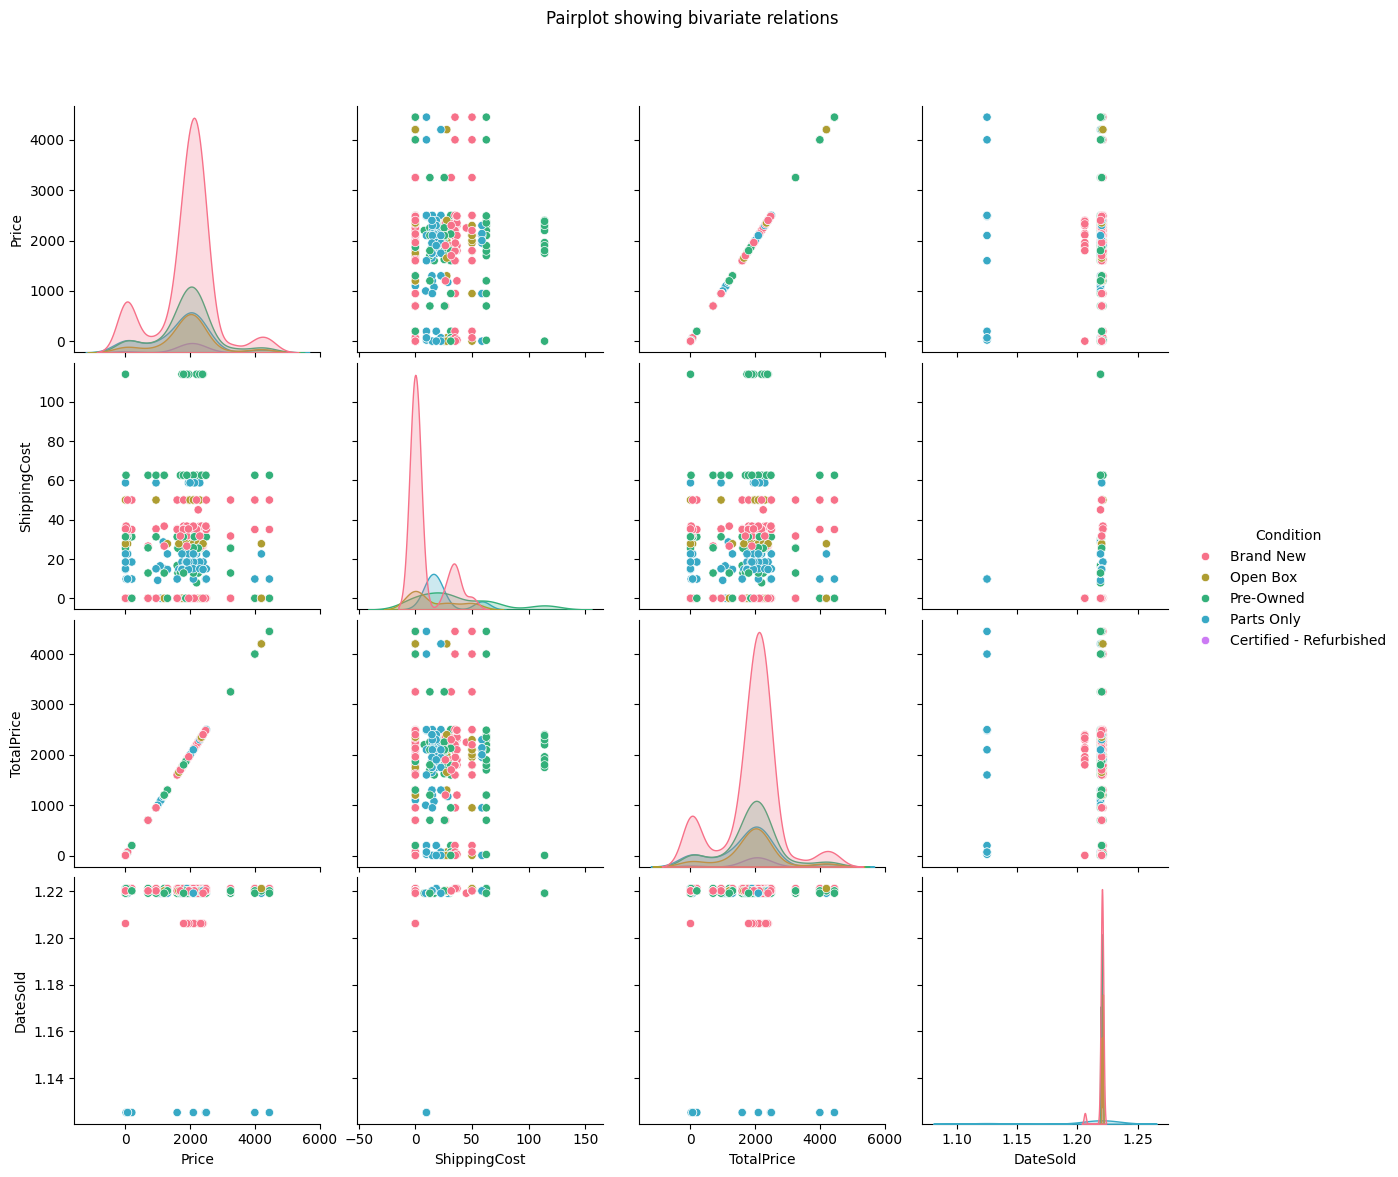

In [14]:
#Code for graphs are inspired from templates provided in class - 1
import seaborn as sns
import matplotlib.pyplot as plt
rp = sns.pairplot(df, hue='Condition', palette='husl', size=3)
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp

rp.fig.suptitle('Pairplot showing bivariate relations')
plt.show()

Text(0.5, 1.0, 'DateSold vs Price')

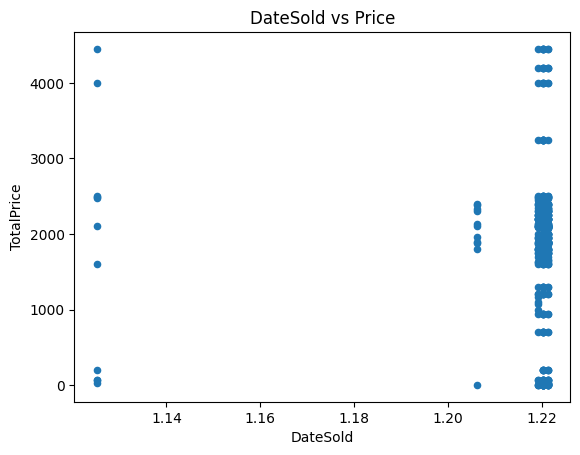

In [15]:
#Scatterplot - 2
df.plot(kind='scatter', x = 'DateSold', y = 'TotalPrice')
plt.title('DateSold vs Price')

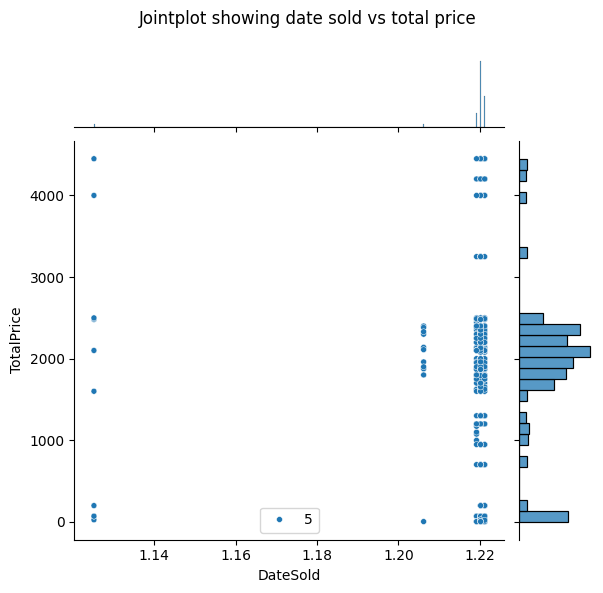

In [20]:
#Jointplot w/ bivarate scatterplots and histograms - 3
rp=sns.jointplot(x = 'DateSold', y = 'TotalPrice', data = df, size =5)
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle('Jointplot showing date sold vs total price')
plt.show()

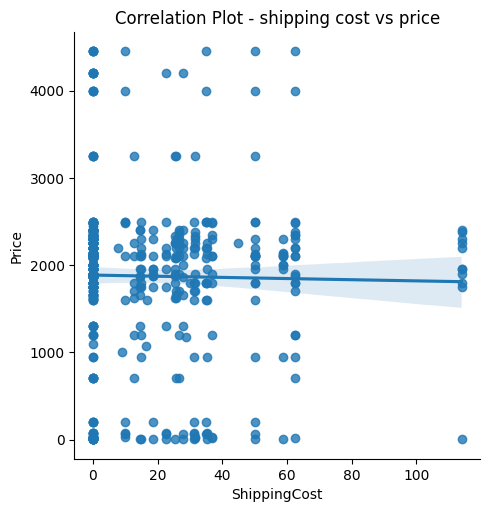

In [21]:
#Correlation Plot - 4
sns.lmplot(x='ShippingCost', y='Price', data=df).set(title='Correlation Plot - shipping cost vs price')

plt.show()

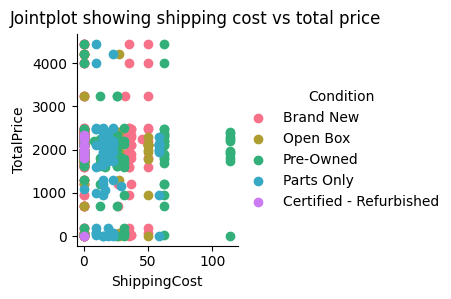

In [26]:
#Joint plot -5
rp=sns.FacetGrid(df, hue='Condition', palette='husl').map(plt.scatter, 'ShippingCost', 'TotalPrice').add_legend()
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle('Jointplot showing shipping cost vs total price')
plt.show()

/var/folders/rx/b_8546rj1cs7wfwsr1m9qh440000gn/T/ipykernel_24840/3576204083.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='ShippingCost', palette='husl', data=df).set(title='Boxplot showing condition vs shipping cost')


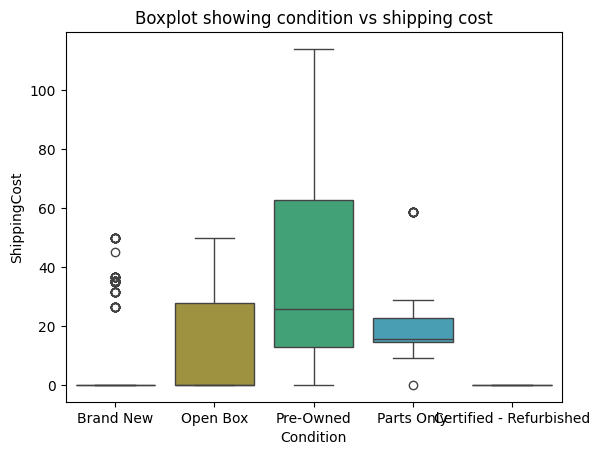

In [27]:
#Box plot - 6
sns.boxplot(x='Condition', y='ShippingCost', palette='husl', data=df).set(title='Boxplot showing condition vs shipping cost')
plt.show()

/var/folders/rx/b_8546rj1cs7wfwsr1m9qh440000gn/T/ipykernel_24840/932492507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y ='TotalPrice', palette='husl', data = df).set(title='Boxplot showing condition vs total price')


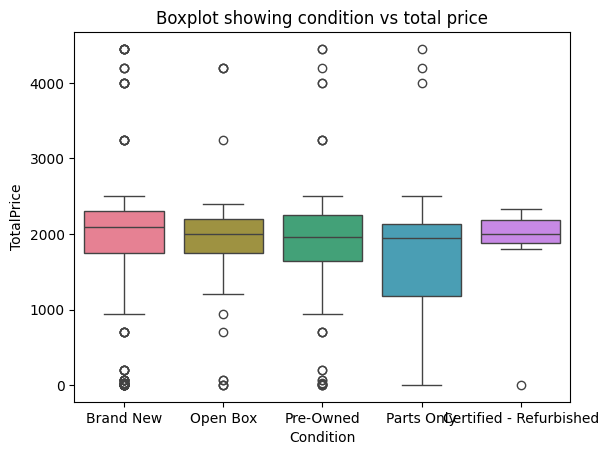

In [29]:
#Box plot - 7
sns.boxplot(x='Condition', y ='TotalPrice', palette='husl', data = df).set(title='Boxplot showing condition vs total price')
plt.show()

/var/folders/rx/b_8546rj1cs7wfwsr1m9qh440000gn/T/ipykernel_24840/1750609457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y ='DateSold', palette='husl', data = df).set(title='Violin plot showing condition vs date sold')


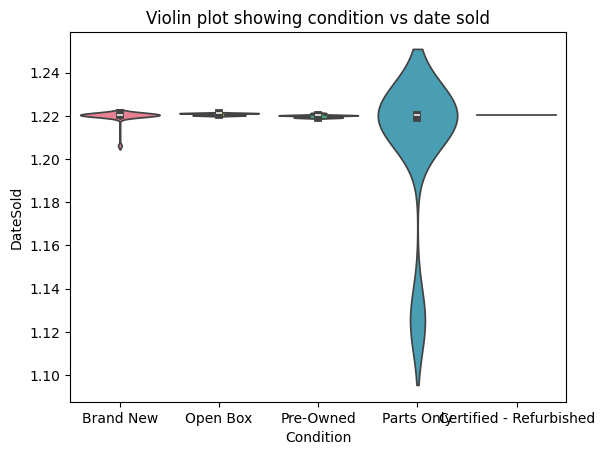

In [30]:
#Violin Plot - 8
sns.violinplot(x='Condition', y ='DateSold', palette='husl', data = df).set(title='Violin plot showing condition vs date sold')
plt.show()

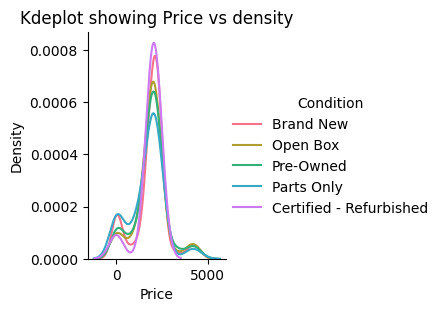

In [32]:
#Kdeplot - 9
#Size is broken
sns.FacetGrid(df, hue='Condition', palette='husl').map(sns.kdeplot, 'Price'). add_legend().set(title='Kdeplot showing Price vs density')
plt.show()

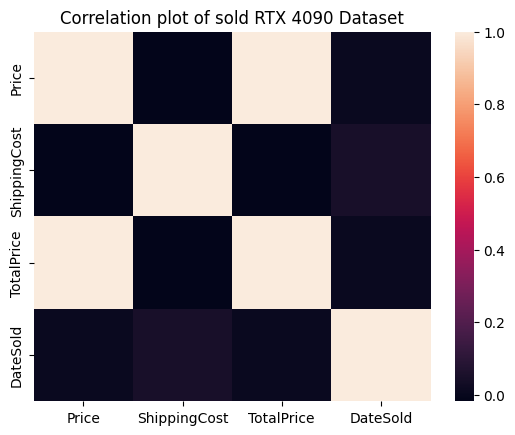

In [34]:
#Heatmap - 10
corr = df.corr(numeric_only=True)

sns.heatmap(corr).set(title='Correlation plot of sold RTX 4090 Dataset')
plt.show()

/var/folders/rx/b_8546rj1cs7wfwsr1m9qh440000gn/T/ipykernel_24840/2978996466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalPrice']).set(title='Histogram showing TotalPrice')


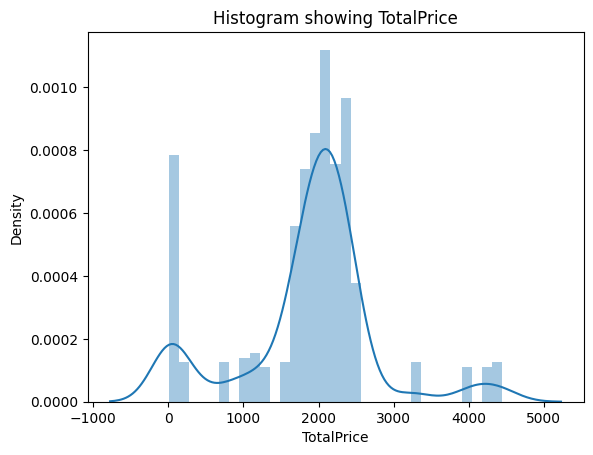

In [35]:
#Histogram - 11
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df['TotalPrice']).set(title='Histogram showing TotalPrice')
plt.show()

/var/folders/rx/b_8546rj1cs7wfwsr1m9qh440000gn/T/ipykernel_24840/3173468923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Condition', data=df, palette=colors)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Brand New'),
  Text(1, 0, 'Open Box'),
  Text(2, 0, 'Pre-Owned'),
  Text(3, 0, 'Parts Only'),
  Text(4, 0, 'Certified - Refurbished')])

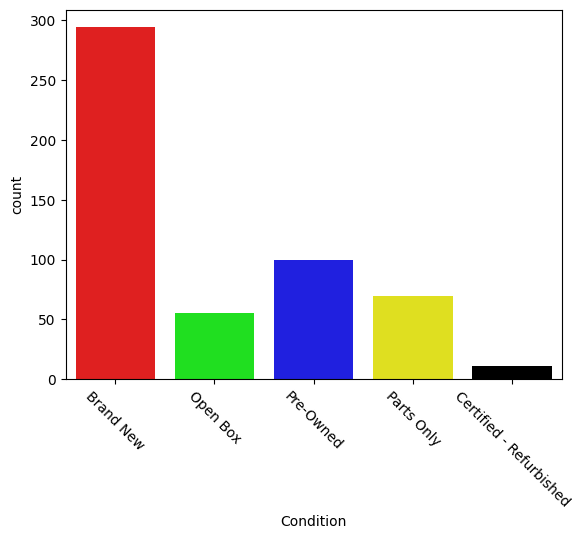

In [37]:
#Bar Plot - 12
colors = ['#FF0000', '#00FF00','#0000FF', '#FFFF00', '000000']
sns.countplot(x='Condition', data=df, palette=colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

In [16]:
df.to_csv('Project2B_Dataset.csv')